In [1]:
import numpy as np
import pandas as pd
import os

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score

from sklearn.datasets import fetch_openml
from keras.utils import np_utils

from matplotlib import pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline
plt.style.use('default')

from itertools import cycle

import pickle

Using TensorFlow backend.
e:\Users\user\anaconda3\envs\metis\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\Users\user\anaconda3\envs\metis\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\Users\user\anaconda3\envs\metis\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\Users\user\anaconda3\envs\metis\lib\site-packag

In [2]:
df_train = pd.read_csv('E:\\Users\\user\\Documents\\GitHub\\Metis\\Metis_Project5_data\\train.csv')

In [3]:
df_train.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31072 entries, 0 to 31071
Data columns (total 2 columns):
Id        31072 non-null object
Target    31072 non-null object
dtypes: object(2)
memory usage: 485.6+ KB


In [5]:
df_train['Target'][0:5]

0       16 0
1    7 1 2 0
2          5
3          1
4         18
Name: Target, dtype: object

In [6]:
type(df_train['Target'][0])

str

In [7]:
df_train['Target'].value_counts()

0             2414
25 0          1998
23            1653
25            1470
7             1163
              ... 
24 19 23 0       1
16 14 3          1
16 25 18         1
25 5 1 0         1
18 3             1
Name: Target, Length: 582, dtype: int64

In [8]:
len(df_train['Target'])

31072

In [9]:
for i in range(28):
    print(i, len(df_train[df_train['Target']==f'{i}']))

0 2414
1 271
2 808
3 654
4 1077
5 983
6 622
7 1163
8 31
9 17
10 0
11 601
12 232
13 157
14 484
15 0
16 27
17 0
18 314
19 522
20 98
21 1058
22 213
23 1653
24 122
25 1470
26 134
27 1


In [31]:
df_0 = df_train[df_train['Target']=='0']
df_4 = df_train[df_train['Target']=='4']
df_5 = df_train[df_train['Target']=='5']
df_7 = df_train[df_train['Target']=='7']
df_21 = df_train[df_train['Target']=='21']
df_23 = df_train[df_train['Target']=='23']
df_25 = df_train[df_train['Target']=='25']
list_df = [df_0, df_4, df_5, df_7, df_21, df_23, df_25]
list_name_df = ['df_0', 'df_4', 'df_5', 'df_7', 'df_21', 'df_23', 'df_25']

In [17]:
path = 'E:\\Users\\user\\Documents\\GitHub\\Metis\\Metis_Project5_data\\train\\'
suffix = '_green.png'

In [41]:
ar_25_pred_dict = np.load('E:\\Users\\user\\Documents\\GitHub\\Metis\\local\\project5\\ar_25_predictions_14Jun.npz')
ar_25_pred = ar_25_pred_dict['arr_0']
ar_25_pred.shape

(1470, 1)

In [42]:
df_25.shape

(1470, 2)

In [43]:
df_25['Predictions'] = ar_25_pred

e:\Users\user\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_25.head()

Id Target  Predictions
15  00383b44-bbbb-11e8-b2ba-ac1f6b6435d0     25     1.000000
17  003957a8-bbb7-11e8-b2ba-ac1f6b6435d0     25     0.999877
28  004f7c66-bb9b-11e8-b2b9-ac1f6b6435d0     25     0.977383
68  0093f39a-bbc9-11e8-b2bc-ac1f6b6435d0     25     0.980206
80  00ae0ea6-bb9c-11e8-b2b9-ac1f6b6435d0     25     0.999877

In [32]:
ar_4_pred_dict = np.load('E:\\Users\\user\\Documents\\GitHub\\Metis\\local\\project5\\ar_4_predictions_14Jun.npz')
ar_4_pred = ar_4_pred_dict['arr_0']
ar_4_pred.shape

(1077, 1)

In [33]:
df_4.shape

(1077, 2)

In [35]:
df_4.head()

Id Target
104  00e77c9c-bbc2-11e8-b2bb-ac1f6b6435d0      4
145  0148ee6a-bba3-11e8-b2b9-ac1f6b6435d0      4
170  0189cff8-bbc0-11e8-b2bb-ac1f6b6435d0      4
186  01b79bd0-bba3-11e8-b2b9-ac1f6b6435d0      4
259  0246331e-bbc0-11e8-b2bb-ac1f6b6435d0      4

In [36]:
df_4['Predictions'] = ar_4_pred

e:\Users\user\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_4.head()

Id Target  Predictions
104  00e77c9c-bbc2-11e8-b2bb-ac1f6b6435d0      4     0.000810
145  0148ee6a-bba3-11e8-b2b9-ac1f6b6435d0      4     0.000281
170  0189cff8-bbc0-11e8-b2bb-ac1f6b6435d0      4     0.002443
186  01b79bd0-bba3-11e8-b2b9-ac1f6b6435d0      4     0.000101
259  0246331e-bbc0-11e8-b2bb-ac1f6b6435d0      4     0.267706

In [57]:
def plot_images(my_df, cutoff, rows=3, less = True):
    
    """
    This function takes in a dataframe in the form of df_4 or df_25 and shows 'rows' number of images 
    less than or greater than the cutoff.
    
    Input: dataframe, cutoff value between 0 and 1, number of rows, boolean
    Output: images displayed
    """
    
    path = 'E:\\Users\\user\\Documents\\GitHub\\Metis\\Metis_Project5_data\\train\\'
    suffix = '_green.png'
    
    if less:
        sub_df = my_df[my_df['Predictions']<=cutoff].sort_values('Predictions', ascending=False).head(rows)
        print('less is true')
        print(sub_df.head())
    else:
        sub_df = my_df[my_df['Predictions']>=cutoff].sort_values('Predictions', ascending=True).head(rows)
        print('less is False')
        print(sub_df.head())
    
    for ix, name in enumerate(sub_df['Id']):
        plt.subplot(230 + 1 + ix)
        image = imread(path + name + suffix)
        plt.axis('off')
        plt.imshow(image)
    plt.show()
    

less is true
                                         Id Target  Predictions
11082  5c1e66de-bbae-11e8-b2ba-ac1f6b6435d0     25          1.0
16593  899632a6-bbca-11e8-b2bc-ac1f6b6435d0     25          1.0
20205  a6da30fe-bbc7-11e8-b2bc-ac1f6b6435d0     25          1.0


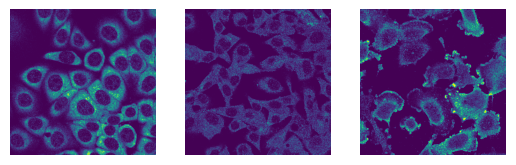

In [58]:
plot_images(df_25, 1)

less is False
                                         Id Target  Predictions
19426  a095f186-bbc9-11e8-b2bc-ac1f6b6435d0     25     0.000387
24506  ca0197a6-bbaf-11e8-b2ba-ac1f6b6435d0     25     0.074227
9017   4b2886e8-bbae-11e8-b2ba-ac1f6b6435d0     25     0.198499


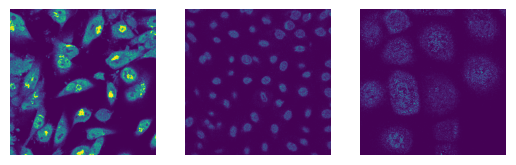

In [64]:
plot_images(df_25, 0, less=False)

less is true
                                        Id Target  Predictions
6985  39ee853c-bb9d-11e8-b2b9-ac1f6b6435d0     25     0.749717
6672  378fe4e6-bbbd-11e8-b2ba-ac1f6b6435d0     25     0.749098
708   064c3eea-bba2-11e8-b2b9-ac1f6b6435d0     25     0.748729


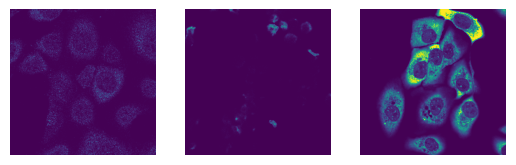

In [65]:
plot_images(df_25, 0.75)

less is true
                                         Id Target  Predictions
17215  8e8cb5b8-bbc6-11e8-b2bc-ac1f6b6435d0     25     0.498689
1417   0bc3dbe0-bbbf-11e8-b2ba-ac1f6b6435d0     25     0.498228
14059  7492bf68-bbad-11e8-b2ba-ac1f6b6435d0     25     0.497270


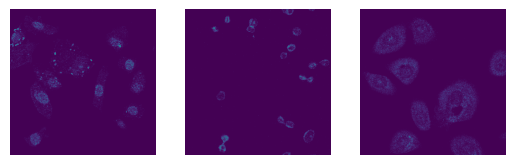

In [66]:
plot_images(df_25, 0.5)

less is true
                                         Id Target  Predictions
25784  d47dc32a-bbb0-11e8-b2ba-ac1f6b6435d0     25     0.209656
9017   4b2886e8-bbae-11e8-b2ba-ac1f6b6435d0     25     0.198499
24506  ca0197a6-bbaf-11e8-b2ba-ac1f6b6435d0     25     0.074227


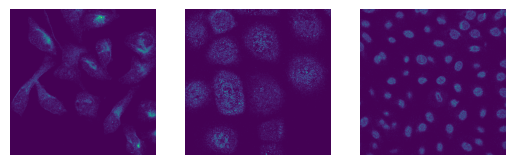

In [67]:
plot_images(df_25, 0.25)

less is False
                                         Id Target   Predictions
15991  847aa45a-bbb6-11e8-b2ba-ac1f6b6435d0      4  4.840289e-12
5580   2e424322-bbb6-11e8-b2ba-ac1f6b6435d0      4  1.355535e-10
825    072206c4-bbb6-11e8-b2ba-ac1f6b6435d0      4  1.677710e-10


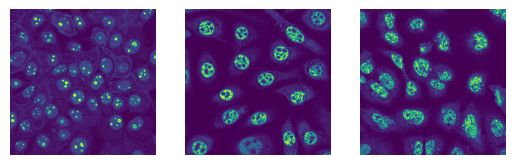

In [69]:
plot_images(df_4, 0, less=False)

less is False
                                         Id Target  Predictions
15098  7d134b46-bbab-11e8-b2ba-ac1f6b6435d0      4     0.255357
10808  59f68b06-bbc3-11e8-b2bc-ac1f6b6435d0      4     0.256629
6786   3848f968-bbb3-11e8-b2ba-ac1f6b6435d0      4     0.256842
25833  d4d110bc-bbc8-11e8-b2bc-ac1f6b6435d0      4     0.260933
878    07a134ce-bb9a-11e8-b2b9-ac1f6b6435d0      4     0.260940


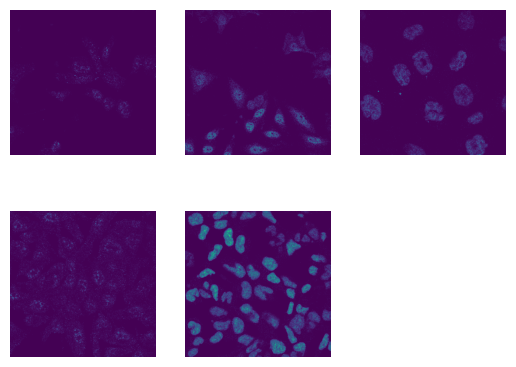

In [71]:
plot_images(df_4, 0.25, less=False, rows=5)

less is False
                                         Id Target  Predictions
11565  60239958-bbb2-11e8-b2ba-ac1f6b6435d0      4     0.505134
16979  8cccdb20-bbb9-11e8-b2ba-ac1f6b6435d0      4     0.516634
6103   32913e30-bbaa-11e8-b2ba-ac1f6b6435d0      4     0.520908
28902  ee139e56-bbb3-11e8-b2ba-ac1f6b6435d0      4     0.539868
8476   4668dd44-bbbb-11e8-b2ba-ac1f6b6435d0      4     0.542423


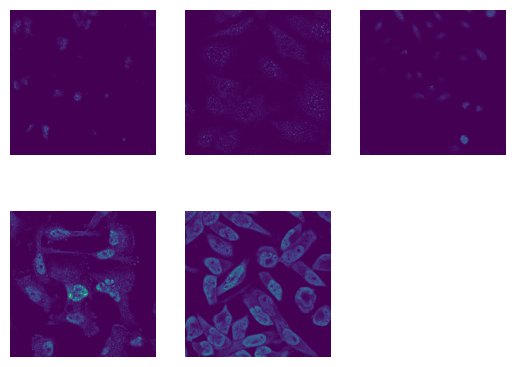

In [72]:
plot_images(df_4, 0.5, less=False, rows=5)

less is False
                                         Id Target  Predictions
27947  e631f25a-bb9a-11e8-b2b9-ac1f6b6435d0      4     0.758982
17018  8d02be76-bbbd-11e8-b2ba-ac1f6b6435d0      4     0.760325
4598   26401796-bbaf-11e8-b2ba-ac1f6b6435d0      4     0.763061
15769  82b35558-bbb7-11e8-b2ba-ac1f6b6435d0      4     0.768600
22528  b9e66f66-bba7-11e8-b2ba-ac1f6b6435d0      4     0.769752


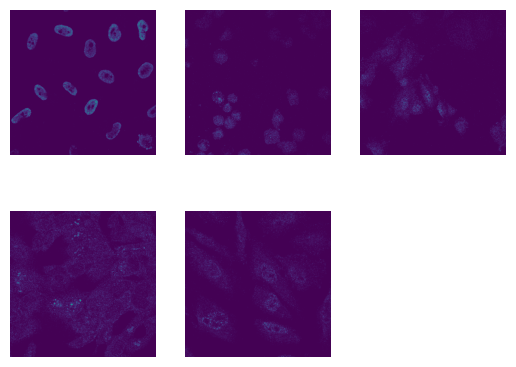

In [73]:
plot_images(df_4, 0.75, less=False, rows=5)

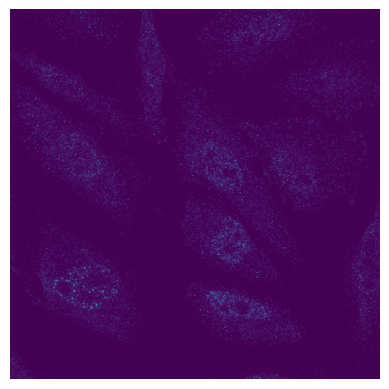

In [94]:
image = imread(path + 'b9e66f66-bba7-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

less is true
                                         Id Target  Predictions
11655  60d20662-bbc3-11e8-b2bc-ac1f6b6435d0      4     0.997075
25902  d55e725a-bbbd-11e8-b2ba-ac1f6b6435d0      4     0.991766
9881   5225dcd0-bba8-11e8-b2ba-ac1f6b6435d0      4     0.988283
13399  6f1a4a60-bbb2-11e8-b2ba-ac1f6b6435d0      4     0.985794
4847   28614bde-bba6-11e8-b2ba-ac1f6b6435d0      4     0.985270


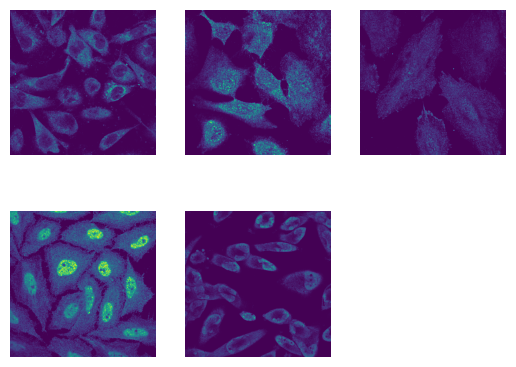

In [74]:
plot_images(df_4, 1, rows=5)

In [115]:
ar_25_wrong_2 = np.array([3.8455918e-01, 4.9822792e-01, 4.7628990e-01, 4.5052966e-01,
       4.1721350e-01, 3.6759216e-01, 3.7848479e-01, 1.9849935e-01,
       3.7952873e-01, 4.2121306e-01, 3.8430339e-01, 4.6698073e-01,
       3.8730460e-01, 3.0787596e-01, 4.9726984e-01, 4.9868900e-01,
       4.3416819e-01, 4.7540012e-01, 3.8669421e-04, 2.8350821e-01,
       7.4226901e-02, 2.0965613e-01, 4.8593679e-01, 3.6539626e-01,
       3.3766490e-01, 3.9168704e-01])

In [112]:
# ar_25_wrong_dict = np.load('ar_25_wrong_14Jun.npz')
# ar_25_wrong = ar_4_wrong_dict['arr_0']

Text(0.5, 1.0, 'Misclassified Cytosol')

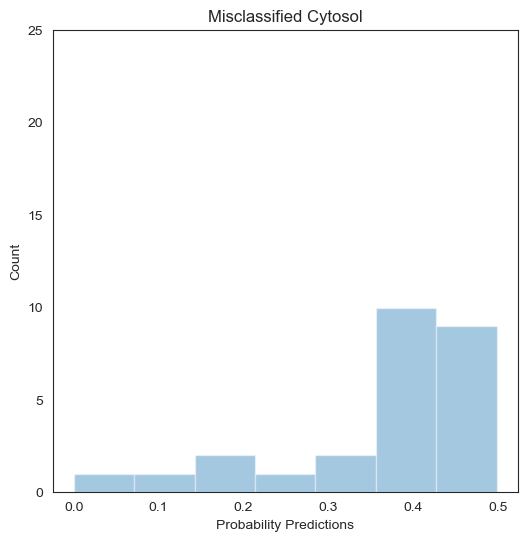

In [120]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(ar_25_wrong_2, kde=False, axlabel= "Probability Predictions", ax= ax)
ax.set(ylim=(0, 25))
ax.set_ylabel('Count')
ax.set_title("Misclassified Cytosol")

Text(0.5, 1.0, 'Misclassified Nuclear Speckles')

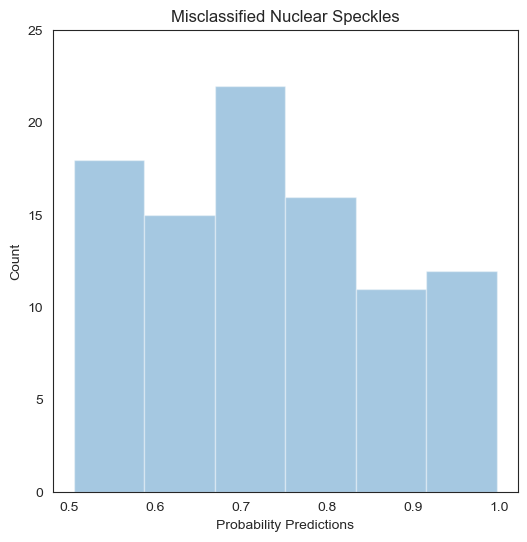

In [119]:
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(ar_4_wrong, kde=False, axlabel= "Probability Predictions", ax= ax)
ax.set(ylim=(0, 25))
ax.set_ylabel('Count')
ax.set_title("Misclassified Nuclear Speckles")

In [24]:
df_25['Id'].iloc[5]

'00c58890-bbbc-11e8-b2ba-ac1f6b6435d0'

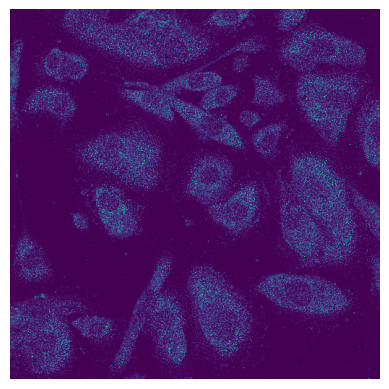

In [25]:
image = imread(path + df_25['Id'].iloc[10] + suffix)
plt.axis('off')
plt.imshow(image)

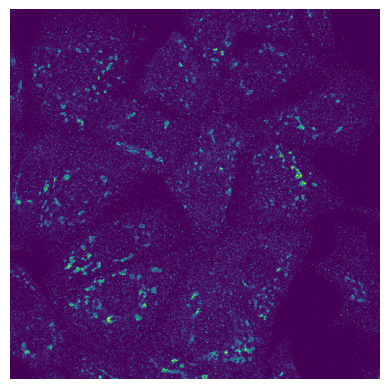

In [53]:
image = imread(path + df_25['Id'].iloc[11] + suffix)
plt.axis('off')
plt.imshow(image)

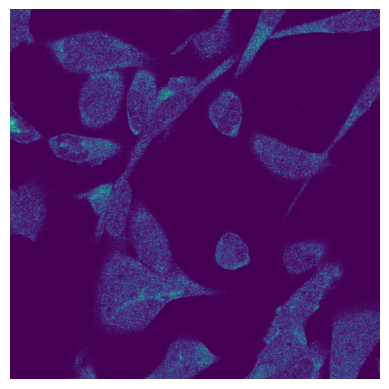

In [54]:
image = imread(path + df_25['Id'].iloc[12] + suffix)
plt.axis('off')
plt.imshow(image)

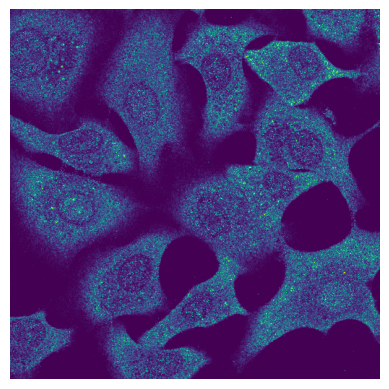

In [55]:
image = imread(path + df_25['Id'].iloc[13] + suffix)
plt.axis('off')
plt.imshow(image)

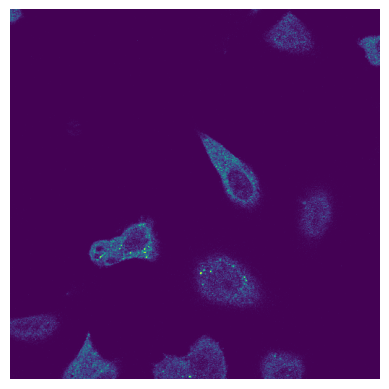

In [61]:
image = imread(path + df_25['Id'].iloc[14] + suffix)
plt.axis('off')
plt.imshow(image)

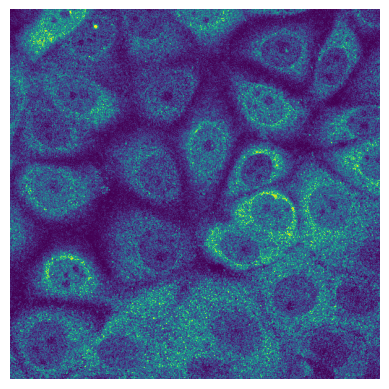

In [68]:
image = imread(path + df_25['Id'].iloc[16] + suffix)
plt.axis('off')
plt.imshow(image)

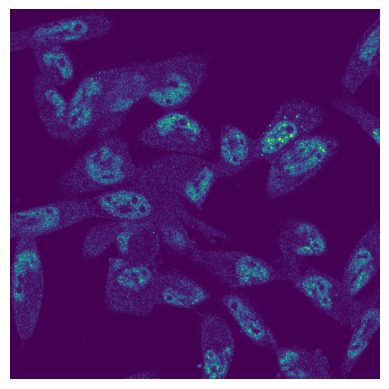

In [56]:
image = imread(path + df_4['Id'].iloc[0] + suffix)
plt.axis('off')
plt.imshow(image)

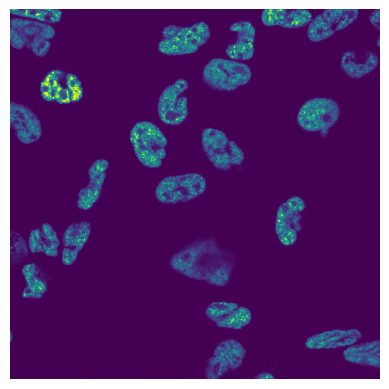

In [57]:
image = imread(path + df_4['Id'].iloc[1] + suffix)
plt.axis('off')
plt.imshow(image)

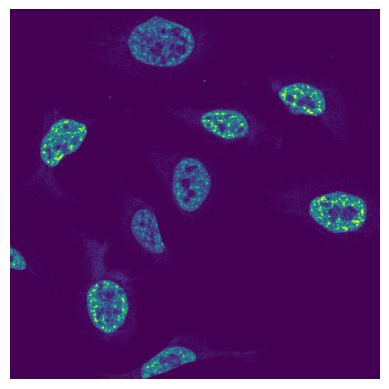

In [58]:
image = imread(path + df_4['Id'].iloc[2] + suffix)
plt.axis('off')
plt.imshow(image)

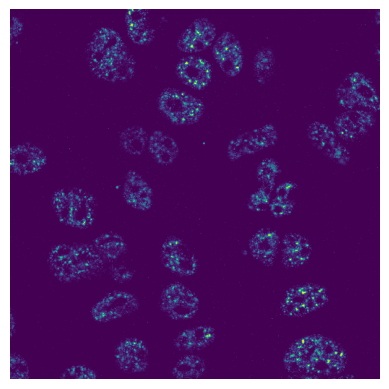

In [59]:
image = imread(path + df_4['Id'].iloc[3] + suffix)
plt.axis('off')
plt.imshow(image)

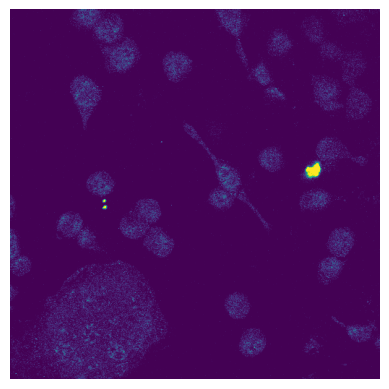

In [60]:
image = imread(path + df_4['Id'].iloc[4] + suffix)
plt.axis('off')
plt.imshow(image)

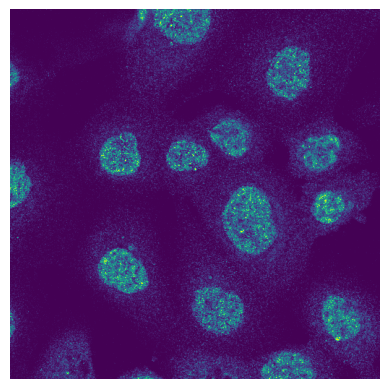

In [69]:
image = imread(path + df_4['Id'].iloc[5] + suffix)
plt.axis('off')
plt.imshow(image)

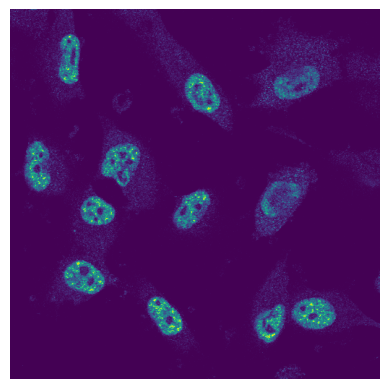

In [62]:
image = imread(path + df_4['Id'].iloc[101] + suffix)
plt.axis('off')
plt.imshow(image)

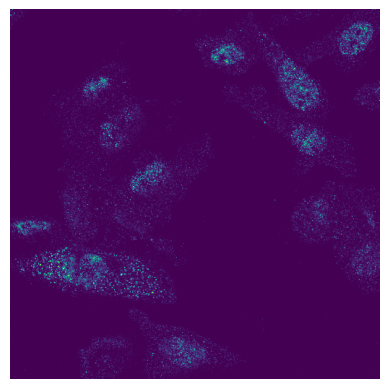

In [63]:
image = imread(path + df_4['Id'].iloc[102] + suffix)
plt.axis('off')
plt.imshow(image)

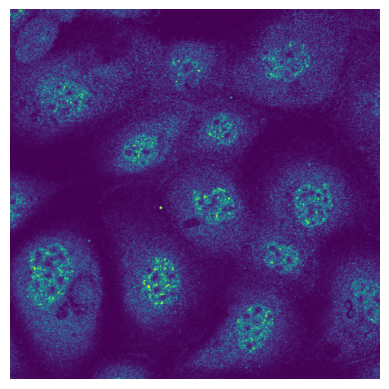

In [64]:
image = imread(path + df_4['Id'].iloc[103] + suffix)
plt.axis('off')
plt.imshow(image)

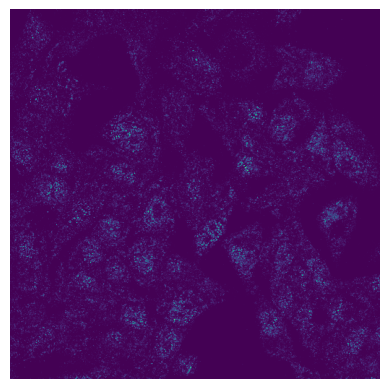

In [65]:
image = imread(path + df_4['Id'].iloc[104] + suffix)
plt.axis('off')
plt.imshow(image)

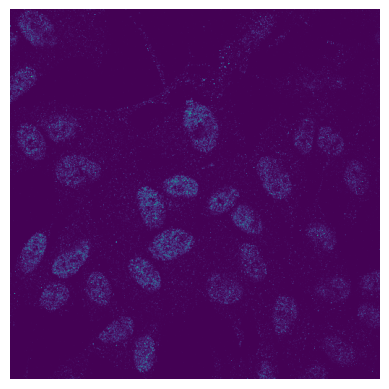

In [66]:
image = imread(path + df_4['Id'].iloc[105] + suffix)
plt.axis('off')
plt.imshow(image)

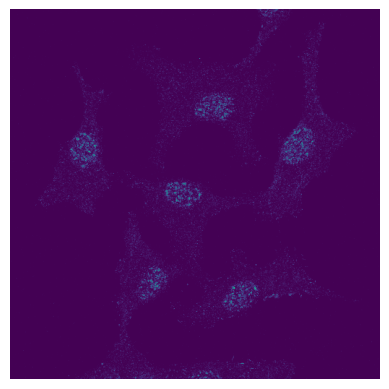

In [67]:
image = imread(path + df_4['Id'].iloc[128] + suffix)
plt.axis('off')
plt.imshow(image)

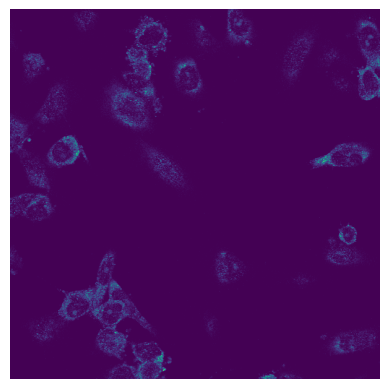

In [70]:
image = imread(path + df_25['Id'].iloc[113] + suffix)
plt.axis('off')
plt.imshow(image)